In [10]:
# Importando pacotes necessários
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2

import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

## Importando DataSet

In [11]:
_URL = "file:C:/Users/Junior/Desktop/Nova pasta/kagglecatsanddogs_5340.zip"
zip_dir = tf.keras.utils.get_file('kagglecatsanddogs_5340.zip', origin=_URL, extract=True)


824887076/824887076 [==============================] - 2s 0us/step


In [12]:
zip_dir

'C:\\Users\\Junior\\.keras\\datasets\\kagglecatsanddogs_5340.zip'

In [16]:
%%capture
!unzip C:\\Users\\Junior\\.keras\\datasets\\kagglecatsanddogs_5340.zip;

In [18]:
# inicializa a taxa de aprendizado inicial, o número de "EPOCHS" para treino e o tamanho do lote
IMG_SIZE = 224
INIT_LR = 1e-4
BS = 256
EPOCHS = 8

In [19]:
train = ImageDataGenerator(
rescale = 1./255,
horizontal_flip=True,
vertical_flip=True,
shear_range=0.2,
zoom_range=0.2,
rotation_range=40, # Faixa de graus para rotações aleatórias
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split=0.2)

In [20]:
dest = 'C:/Users/Junior/PetImages'

## Removendo imagens corrompidas

In [21]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

In [23]:
path = Path('C:/Users/Junior/PetImages/Cat').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

C:\Users\Junior\PetImages\Cat\666.jpg


In [24]:
import os
try: 
    os.remove("C:/Users/Junior/PetImages/Cat/666.jpg")
    print("removida")
except:
    print("Não foi possível removê-la") 
pass

removida


In [25]:
path = Path('C:/Users/Junior/PetImages/Dog').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

C:\Users\Junior\PetImages\Dog\11702.jpg


C:\Users\Junior\anaconda3\envs\tensorflow\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [26]:
import os
try: 
    os.remove("C:/Users/Junior/PetImages/Dog/11702.jpg")
    print("removida")
except:
    print("Não foi possível removê-la") 
pass

removida


 ## Set de Treino e Set de Validação

In [27]:
trainset = train.flow_from_directory(dest,
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = "training",
class_mode='categorical')

Found 20000 images belonging to 2 classes.


In [28]:
validset = train.flow_from_directory(dest,
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = "validation",
class_mode='categorical')

Found 4998 images belonging to 2 classes.


In [29]:
NUM_CLASSES = 2

## Arquitetura do modelo - Xception!

In [30]:
# Carregando a rede "MobileNetV2", garantindo que os conjuntos de camadas "FC" (fully connected) principais sejam deixados de fora
baseModel = Xception(weights="imagenet", include_top=False,input_tensor=Input(shape=(IMG_SIZE,IMG_SIZE, 3)))

# Construindo a cabeça do modelo que será colocado no topo do modelo base
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.8)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)

# Colocando o modelo FC principal no topo do modelo base (este se tornará o modelo real que vamos treinar)
model = Model(inputs=baseModel.input, outputs=headModel)

# Fazendo um loop sobre todas as camadas no modelo base e travando-as para que não sejam atualizadas durante o primeiro processo de treinamento
for layer in baseModel.layers:
	layer.trainable = False


# Compilando nosso modelo
print("[INFO] compilando modelo...")
opt = Adam()
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

# Treinando o topo da rede
print("[INFO] Treinando o topo...")

83683744/83683744 [==============================] - 7s 0us/step
[INFO] compilando modelo...
[INFO] Treinando o topo...


## Treinando

In [31]:
H = model.fit_generator(
	trainset,
  validation_data = validset,
	epochs=EPOCHS)

C:\Users\Junior\AppData\Local\Temp\ipykernel_12292\1129683363.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/8
79/79 [==============================] - 742s 9s/step - loss: 0.7888 - accuracy: 0.5031 - val_loss: 0.5366 - val_accuracy: 0.5010
Epoch 2/8
79/79 [==============================] - 727s 9s/step - loss: 0.6117 - accuracy: 0.6170 - val_loss: 0.5037 - val_accuracy: 0.8954
Epoch 3/8
79/79 [==============================] - 727s 9s/step - loss: 0.5967 - accuracy: 0.6683 - val_loss: 0.4640 - val_accuracy: 0.8758
Epoch 4/8
79/79 [==============================] - 727s 9s/step - loss: 0.5638 - accuracy: 0.7357 - val_loss: 0.4503 - val_accuracy: 0.9144
Epoch 5/8
79/79 [==============================] - 730s 9s/step - loss: 0.5349 - accuracy: 0.7660 - val_loss: 0.4520 - val_accuracy: 0.9130
Epoch 6/8
79/79 [==============================] - 728s 9s/step - loss: 0.5227 - accuracy: 0.7761 - val_loss: 0.4232 - val_accuracy: 0.9182
Epoch 7/8
79/79 [==============================] - 729s 9s/step - loss: 0.5147 - accuracy: 0.7796 - val_loss: 0.4192 - val_accuracy: 0.9194
Epoch 8/8
79/79 [===

In [34]:
# Serializando o modelo no disco
print("[INFO] salvando o modelo detector de máscara...")
model.save('gato_cachorro.h5', save_format="h5")

[INFO] salvando o modelo detector de máscara...


## Gráfico de Erro e de Precisão

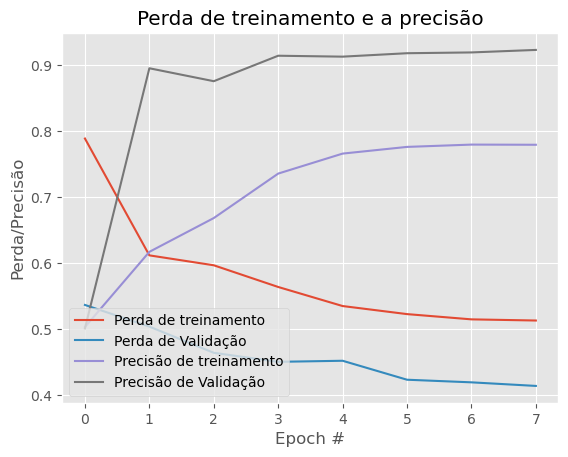

<Figure size 640x480 with 0 Axes>

In [33]:
# Plotando os Erros no Treino e a Precisão
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="Erros no treinamento")
plt.plot(np.arange(0, N), H.history["val_loss"], label="Erros na Validação")
plt.plot(np.arange(0, N), H.history["accuracy"], label="Precisão do treinamento")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="Precisão da Validação")
plt.title("Erros no treinamento e  precisão")
plt.xlabel("Epoch nº")
plt.ylabel("Erros/Precisão")
plt.legend(loc="lower left")
plt.show()
plt.savefig('graph.png')